<h3>Name:- Babin Joshi<br/>
    Roll No:- 19
</h3>

<h1>Chapter - 2<br>
    Classifying with Real-world examples
</h1>

<h1>The Iris dataset</h1>

The dataset is a collection of morphological measurements of several Iris flowers. These measurements will enable us to distingish multiple species of the flowers.
The following four attributes of each plant were measured:<br>
• sepal length<br>
• sepal width<br>
• petal length<br>
• petal width

In general, we will call the individual numeric measurements we use to describe
our data <b>features</b>. These features can be directly measured or computed from
intermediate data

<b>The problem we want to solve is, "Given these examples, if we see a new flower out in
the field, could we make a good prediction about its species from its measurements?"</b><br>
This is the <b>supervised learning or classification problem</b>: given labeled examples,
can we design a rule to be later applied to other examples? 

<h1>Visualization is a good first step</h1>

In [1]:
from matplotlib import pyplot as plt
import numpy as np

In [2]:
#We load the data with load_iris from sklearn
from sklearn.datasets import load_iris

data = load_iris()

In [3]:
#load_iris returns an object with several fields
features = data.data
feature_names = data.feature_names
target = data.target
target_names = data.target_names

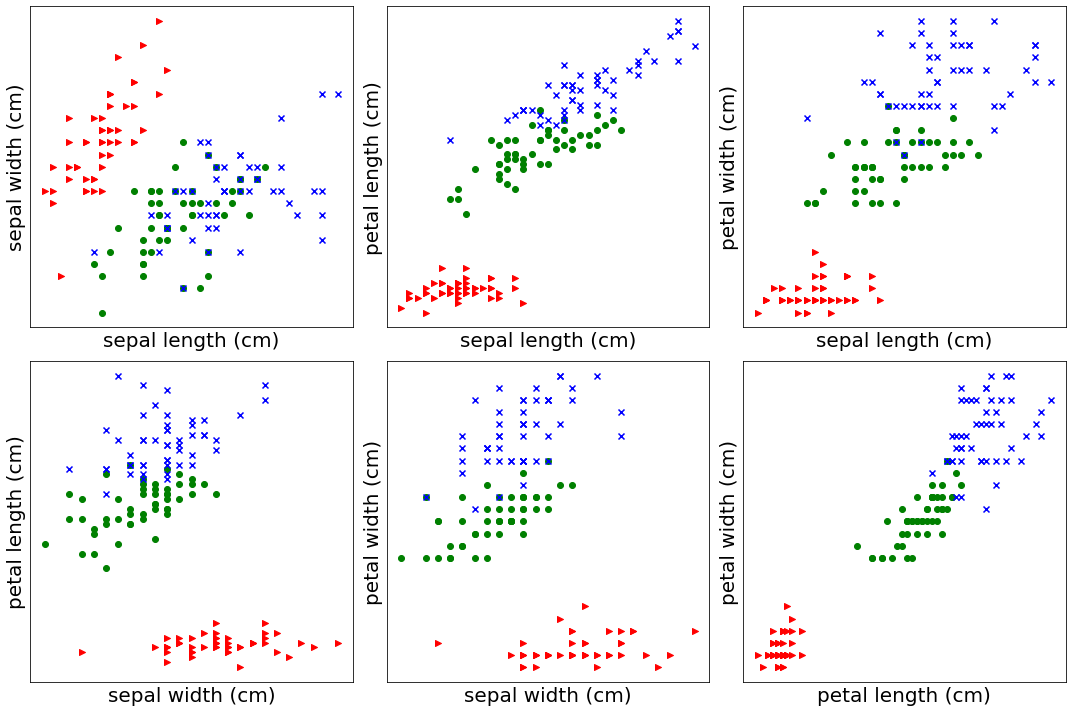

In [4]:
fig,axes = plt.subplots(2, 3,figsize=(15,10))
pairs = [(0, 1), (0, 2), (0, 3), (1, 2), (1, 3), (2, 3)]

color_markers = [
        ('r', '>'),
        ('g', 'o'),
        ('b', 'x'),
        ]

for i, (p0, p1) in enumerate(pairs):
    ax = axes.flat[i]

    for t in range(3):
        # Use a different color/marker for each class `t`
        c,marker = color_markers[t]
        ax.scatter(features[target == t, p0], features[
                    target == t, p1], marker=marker, c=c)
    ax.set_xlabel(feature_names[p0],)
    ax.set_ylabel(feature_names[p1])
    ax.xaxis.label.set_size(20)
    ax.yaxis.label.set_size(20)
    ax.set_xticks([])
    ax.set_yticks([])
fig.tight_layout()

<h1>Building our first classification model</h1>

In [5]:
target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [6]:
target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [7]:
#We use NumPy fancy indexing to get an array of strings:
labels = target_names[target]

In [8]:
labels

array(['setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolo

In [9]:
feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [10]:
#The petal length is the feature at position 2
plength = features[:,2]

In [11]:
plength

array([1.4, 1.4, 1.3, 1.5, 1.4, 1.7, 1.4, 1.5, 1.4, 1.5, 1.5, 1.6, 1.4,
       1.1, 1.2, 1.5, 1.3, 1.4, 1.7, 1.5, 1.7, 1.5, 1. , 1.7, 1.9, 1.6,
       1.6, 1.5, 1.4, 1.6, 1.6, 1.5, 1.5, 1.4, 1.5, 1.2, 1.3, 1.4, 1.3,
       1.5, 1.3, 1.3, 1.3, 1.6, 1.9, 1.4, 1.6, 1.4, 1.5, 1.4, 4.7, 4.5,
       4.9, 4. , 4.6, 4.5, 4.7, 3.3, 4.6, 3.9, 3.5, 4.2, 4. , 4.7, 3.6,
       4.4, 4.5, 4.1, 4.5, 3.9, 4.8, 4. , 4.9, 4.7, 4.3, 4.4, 4.8, 5. ,
       4.5, 3.5, 3.8, 3.7, 3.9, 5.1, 4.5, 4.5, 4.7, 4.4, 4.1, 4. , 4.4,
       4.6, 4. , 3.3, 4.2, 4.2, 4.2, 4.3, 3. , 4.1, 6. , 5.1, 5.9, 5.6,
       5.8, 6.6, 4.5, 6.3, 5.8, 6.1, 5.1, 5.3, 5.5, 5. , 5.1, 5.3, 5.5,
       6.7, 6.9, 5. , 5.7, 4.9, 6.7, 4.9, 5.7, 6. , 4.8, 4.9, 5.6, 5.8,
       6.1, 6.4, 5.6, 5.1, 5.6, 6.1, 5.6, 5.5, 4.8, 5.4, 5.6, 5.1, 5.1,
       5.9, 5.7, 5.2, 5. , 5.2, 5.4, 5.1])

In [12]:
#Build an array of booleans:
is_setosa = (labels=='setosa')

In [13]:
is_setosa

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,

In [14]:
#This is the important step:
max_setosa = plength[is_setosa].max()
min_non_setosa = plength[~(is_setosa)].min()
print(f"Maximum of setosa: {max_setosa}")
print(f"Minimum of others: {min_non_setosa}")

Maximum of setosa: 1.9
Minimum of others: 3.0


Therefore, we can build a simple model that is if the petal length is smaller than 2, then this is an Iris Setosa flower; otherwise it is either Irisi Virginica or Iris Versicolor. 

However, we cannot immediately see what the best threshold is for
distinguishing Iris Virginica from Iris Versicolor. We can even see that we will never
achieve perfect separation with these features. We could, however, look for the best
possible separation, the separation that makes the fewest mistakes. For this, we will
perform a little computation.

We first select only the non-Setosa features and labels:

In [15]:
# ~ is the boolean negation operator
features = features[~is_setosa]
labels = labels[~is_setosa]
#Build a new target variable, is_virginica
is_virginica = (labels == 'virginica')

Now, we run a loop over all possible features and thresholds to see which one
results in better accuracy. Accuracy is simply the fraction of examples that the
model classifies correctly

In [16]:
#Initialize best_acc to impossibly low value
best_acc = -1.0
for fi in range(features.shape[1]):
    #We are going to test all possible thresholds
    thresh = features[:,fi]
    for t in thresh:
        #Get the vector for feature 'fi'
        feature_i = features[:, fi]
        #apply threshold 't'
        pred = (feature_i>t)
        acc = (pred == is_virginica).mean()
        rev_acc = (pred == ~is_virginica).mean()
        if rev_acc > acc:
            reverse = True
            acc = rev_acc
        else:
            reverse = False
            
        if acc > best_acc:
            best_acc = acc
            best_fi = fi
            best_t = t
            best_reverse = reverse

In [17]:
print(f"Accuracy: {best_acc}" )

Accuracy: 0.94


The last few lines select the best model. First, we compare the predictions, pred,
with the actual labels, is_virginica. The little trick of computing the mean of the
comparisons gives us the fraction of correct results, the accuracy. At the end of the
for loop, all the possible thresholds for all the possible features have been tested,
and the variables best_fi, best_t, and best_reverse hold our model. This is all
the information we need to be able to classify a new, unknown object, that is, to
assign a class to it. 

In [18]:
def is_viginica_test(fi, t, reverse, example):
    """Aplly threshold model to a new example"""
    test = example[fi] > t
    if reverse:
        test = not test
    return test


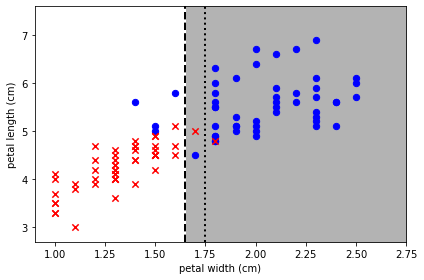

In [19]:
COLOUR_FIGURE = False

# Hand fixed thresholds:
t = 1.65
t2 = 1.75

# Features to use: 3 & 2
f0, f1 = 3, 2

if COLOUR_FIGURE:
    area1c = (1., .8, .8)
    area2c = (.8, .8, 1.)
else:
    area1c = (1., 1, 1)
    area2c = (.7, .7, .7)

# Plot from 90% of smallest value to 110% of largest value
# (all feature values are positive, otherwise this would not work very well)

x0 = features[:, f0].min() * .9
x1 = features[:, f0].max() * 1.1

y0 = features[:, f1].min() * .9
y1 = features[:, f1].max() * 1.1

fig,ax = plt.subplots()
ax.fill_between([t, x1], [y0, y0], [y1, y1], color=area2c)
ax.fill_between([x0, t], [y0, y0], [y1, y1], color=area1c)
ax.plot([t, t], [y0, y1], 'k--', lw=2)
ax.plot([t2, t2], [y0, y1], 'k:', lw=2)
ax.scatter(features[is_virginica, f0],
            features[is_virginica, f1], c='b', marker='o', s=40)
ax.scatter(features[~is_virginica, f0],
            features[~is_virginica, f1], c='r', marker='x', s=40)
ax.set_ylim(y0, y1)
ax.set_xlim(x0, x1)
ax.set_xlabel(feature_names[f0])
ax.set_ylabel(feature_names[f1])
fig.tight_layout()


<h1>Evaluation - holding out data and cross-validation</h1>

What we really want to do is estimate the ability of the model to generalize to new
instances. We should measure its performance in instances that the algorithm has
not seen at training. Therefore, we are going to do a more rigorous evaluation and
use held-out data. For this, we are going to break up the data into two groups: on
one group, we'll train the model, and on the other, we'll test the one we held out
of training

<b>Note: </b> The accuracy on the training data, the training accuracy, is almost
always an overly optimistic estimate of how well your algorithm is
doing. We should always measure and report the testing accuracy,
which is the accuracy on a collection of examples that were not used
for training.

One possible problem with what we did previously, which was to hold out data
from training, is that we only used half the data for training. Perhaps it would
have been better to use more training data. On the other hand, if we then leave too
little data for testing, the error estimation is performed on a very small number of
examples. Ideally, we would like to use all of the data for training and all of the data
for testing as well, which is impossible.

<b>We can achieve a good approximation of this impossible ideal by a method called
cross-validation. One simple form of cross-validation is leave-one-out cross-validation</b>

In [20]:
def fit_model(features, labels):
    '''Learn a simple threshold model'''
    best_acc = -1.0
    # Loop over all the features:
    for fi in range(features.shape[1]):
        thresh = features[:, fi].copy()
        # test all feature values in order:
        thresh.sort()
        for t in thresh:
            pred = (features[:, fi] > t)

            # Measure the accuracy of this 
            acc = (pred == labels).mean()

            rev_acc = (pred == ~labels).mean()
            if rev_acc > acc:
                acc = rev_acc
                reverse = True
            else:
                reverse = False
            if acc > best_acc:
                best_acc = acc
                best_fi = fi
                best_t = t
                best_reverse = reverse

    # A model is a threshold and an index
    return best_t, best_fi, best_reverse


def predict(model, features):
    '''Apply a learned model'''
    # A model is a pair as returned by fit_model
    t, fi, reverse = model
    if reverse:
        return features[:, fi] <= t
    else:
        return features[:, fi] > t

    
def accuracy(features, labels, model):
    '''Compute the accuracy of the model'''
    preds = predict(model, features)
    return np.mean(preds == labels)

The following code implements exactly this type of <b>cross-validation</b>

In [22]:
correct= 0.0
for ei in range(len(features)):
    #select all but the one at position'ei':
    training = np.ones(len(features), bool)
    training[ei] = False
    testing = ~training
    model = fit_model(features[training], is_virginica[training])
    predictions = predict(model, features[testing])
    correct += np.sum(predictions==is_virginica[testing])
acc = correct / float(len(features))
print(f"Accuracy: {acc*100}%")

Accuracy: 87.0%


<b>Note</b> At the end of this loop, we will have tested a series of models on all the examples and have obtainied a final average result. <b>When using cross-validation, there is no circulatory problem because each example was tested on a model which was built without taking that datapoint into account.</b> Therefore, the cross-validated estimate is a realiable estimate of how well the models would generalize to new data.

<b>Note: </b> The major problems with leave-one-out cross-validation is that we are now forced to perfrom many times more work. In fact, we must learn a whole new model for each and every example and this cost will increase as our dataset grows. 

We can get most of the benefits of leave-one-out at a fraction of the cost by using
x-fold cross-validation, where x stands for a small number. For example, to perform
five-fold cross-validation, we break up the data into five groups, so-called five folds.<br/>
Then you learn five models: each time you will leave one fold out of the training
data. The resulting code will be similar to the code given earlier in this section, but
we leave 20 percent of the data out instead of just one element. We test each of these
models on the left-out fold and average the results

We have now generated several models instead of just one. So, "What final model
do we return and use for new data?" The simplest solution is now to train a single
overall model on all your training data. The cross-validation loop gives you an
estimate of how well this model should generalize.

<h1>Learning about the Seeds dataset</h1>

<h3>Nearest Neighbor Classication</h3>

The nearest neighbor classifier is veyr simple. When classifying a new element, it looks at the training data for the object that is closes to it, its nearest neighbor. Then, it returns its label as the answer. Notice that this model performs perfectly on tis training data! For each point, its closest neighbor is itself, and os its label matches perfectly. Therefore, it is essential to test the classification using a cross-validation protocol.

In [27]:
def load_dataset(dataset_name):
    data = []
    labels = []
    with open('./{0}.tsv'.format(dataset_name)) as ifile:
        for line in ifile:
            tokens = line.strip().split('\t')
            data.append([float(tk) for tk in tokens[:-1]])
            labels.append(tokens[-1])
    data = np.array(data)
    labels = np.array(labels)
    return data, labels

In [28]:
feature_names = [
    'area',
    'perimeter',
    'compactness',
    'length of kernel',
    'width of kernel', 
    'assymtery coefficient',
    'length of kernel groove'
]

features, labels = load_dataset('seeds')

<h1>Classifying with scikit-learn</h1>

The scikit-learn classification API is organized around classifier objects. These objects
have the following two essential methods:<br/>
• fit(features, labels): This is the learning step and fits the parameters of
the model<br/>
• predict(features): This method can only be called after fit and returns a
prediction for one or more inputs

In [38]:
from sklearn.neighbors import KNeighborsClassifier
'''
    We can now instantiate a classifier object. In the constructor, we 
    specify the number of neighbors to consider, as follows:
'''
classifier = KNeighborsClassifier(n_neighbors=1)
#If we do not specify the number of neighbors, it defaults to 5, 
#which is often a good choice for classification
from sklearn.model_selection import KFold

In [58]:
kf = KFold(n_splits = 5, shuffle=True)

In [59]:
kf.get_n_splits(len(features))

5

In [60]:
kf

KFold(n_splits=5, random_state=None, shuffle=True)

In [67]:
means = []
for training, testing in kf.split(features):
    classifier.fit(features[training], labels[training])
    prediction = classifier.predict(features[testing])
    curmean = np.mean(prediction == labels[testing])
    means.append(curmean)

In [70]:
print(f"Mean accuracy: {np.mean(means)*100}%")

Mean accuracy: 90.47619047619048%


<h1>Looking at the decision boundaries</h1>

In [71]:
def fit_model(k, features, labels):
    '''Learn a k-nn model'''
    # There is no model in k-nn, just a copy of the inputs
    return k, features.copy(), labels.copy()


def predict(model, features):
    '''Apply k-nn model'''
    k, train_feats, labels = model
    results = []
    for f in features:
        label_dist = []
        # Compute all distances:
        for t, ell in zip(train_feats, labels):
            label_dist.append((np.linalg.norm(f - t), ell))
        label_dist.sort(key=lambda d_ell: d_ell[0])
        label_dist = label_dist[:k]
        results.append(plurality([ell for _, ell in label_dist]))
    return np.array(results)


def plurality(xs):
    '''Find the most common element in a collection'''
    from collections import defaultdict
    counts = defaultdict(int)
    for x in xs:
        counts[x] += 1
    maxv = max(counts.values())
    for k, v in counts.items():
        if v == maxv:
            return k

<ipython-input-72-8b16e8cbd240>:49: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  ax.pcolormesh(X, Y, C, cmap=cmap)
<ipython-input-72-8b16e8cbd240>:49: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  ax.pcolormesh(X, Y, C, cmap=cmap)


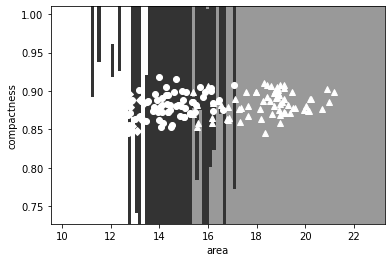

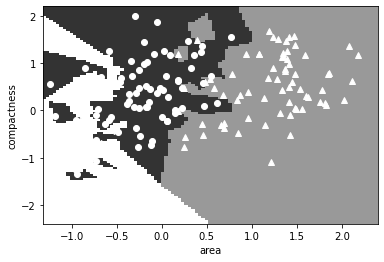

In [72]:
from matplotlib import pyplot as plt
from matplotlib.colors import ListedColormap
# from load import load_dataset
import numpy as np
# from knn import fit_model, predict

feature_names = [
    'area',
    'perimeter',
    'compactness',
    'length of kernel',
    'width of kernel',
    'asymmetry coefficien',
    'length of kernel groove',
]


def plot_decision(features, labels):
    '''Plots decision boundary for KNN

    Parameters
    ----------
    features : ndarray
    labels : sequence

    Returns
    -------
    fig : Matplotlib Figure
    ax  : Matplotlib Axes
    '''
    y0, y1 = features[:, 2].min() * .9, features[:, 2].max() * 1.1
    x0, x1 = features[:, 0].min() * .9, features[:, 0].max() * 1.1
    X = np.linspace(x0, x1, 100)
    Y = np.linspace(y0, y1, 100)
    X, Y = np.meshgrid(X, Y)

    model = fit_model(1, features[:, (0, 2)], np.array(labels))
    C = predict(
        model, np.vstack([X.ravel(), Y.ravel()]).T).reshape(X.shape)
    if COLOUR_FIGURE:
        cmap = ListedColormap([(1., .6, .6), (.6, 1., .6), (.6, .6, 1.)])
    else:
        cmap = ListedColormap([(1., 1., 1.), (.2, .2, .2), (.6, .6, .6)])
    fig,ax = plt.subplots()
    ax.set_xlim(x0, x1)
    ax.set_ylim(y0, y1)
    ax.set_xlabel(feature_names[0])
    ax.set_ylabel(feature_names[2])
    ax.pcolormesh(X, Y, C, cmap=cmap)
    if COLOUR_FIGURE:
        cmap = ListedColormap([(1., .0, .0), (.0, 1., .0), (.0, .0, 1.)])
        ax.scatter(features[:, 0], features[:, 2], c=labels, cmap=cmap)
    else:
        for lab, ma in zip(range(3), "Do^"):
            ax.plot(features[labels == lab, 0], features[
                     labels == lab, 2], ma, c=(1., 1., 1.))
    return fig,ax


features, labels = load_dataset('seeds')
names = sorted(set(labels))
labels = np.array([names.index(ell) for ell in labels])

fig,ax = plot_decision(features, labels)

features -= features.mean(0)
features /= features.std(0)
fig,ax = plot_decision(features, labels)


In [73]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

classifier = KNeighborsClassifier(n_neighbors=1)
classifier = Pipeline([('norm', StandardScaler()), ('knn', classifier)])

In [75]:
means = []
for training, testing in kf.split(features):
    #We learn a model for this fold with 'fit' and then apply it to the 
    #testing data with 'predict':
    classifier.fit(features[training], labels[training])
    prediction = classifier.predict(features[testing])

    #np.mean on an array of booleans returns fraction of correct
    #decisions for this fold:
    curmean = np.mean(prediction == labels[testing])
    means.append(curmean)
print(f"Mean Accuracy: {np.mean(means)*100}%")

Mean Accuracy: 90.95238095238095%
